# Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor as SKDummyRegressor
from sklearn import datasets

seed = 42
np.random.seed(seed)

# Veri Seti

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Dummy Regressor

In [4]:
class DummyRegressor:
    def __init__(self, strategy="mean", constant_value=None):
        # Strateji (mean - median - constant)
        self.strategy = strategy
        # Sabit deger
        self.constant_value = constant_value
        # Ortalama deger
        self.mean_value = None
        # Medyan deger
        self.median_value = None

    def fit(self, X, y):
        # Ortalama ile tahmin
        if self.strategy == "mean":
            self.mean_value = np.mean(y)
        # Medyan ile tahmin
        elif self.strategy == "median":
            self.median_value = np.median(y)
        # Sabit deger ile tahmin
        elif self.strategy == "constant" and self.constant_value is not None:
            self.constant_value = self.constant_value

    def predict(self, X):
        n_samples = X.shape[0]
        if self.strategy == "mean":
            return np.full(n_samples, self.mean_value)
        elif self.strategy == "median":
            return np.full(n_samples, self.median_value)
        elif self.strategy == "constant" and self.contant_value is not None:
            return np.full(n_samples, self.constant_value)

# Eğitim

In [5]:
dr = DummyRegressor(strategy="mean")
dr.fit(X_train, y_train)

# Tahmin

In [6]:
y_pred = dr.predict(X_test)

In [7]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: -0.17773332798392993


In [8]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 7259.234162553296


# Sonuçlar

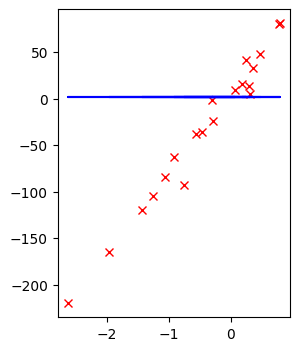

In [9]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b")
plt.show()

# Scikit-Learn

In [10]:
dr2 = SKDummyRegressor(strategy="mean")
dr2.fit(X_train, y_train)

DummyRegressor()

In [11]:
y_pred_2 = dr2.predict(X_test)

In [12]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: -0.17773332798392993


In [13]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 7259.234162553296
